## Определение перспективного тарифа для телеком компании

В исследовании проанализировано поведение клиентов компании «Мегалайн» в 2018 году опираясь на даннные следующих таблиц:

    1. Информация о звонках /datasets/calls.csv
    2. Информация об интернет-сессиях - /datasets/internet.csv
    3. Информация о сообщениях - /datasets/messages.csv
    4. Информация о тарифах - /datasets/tariffs.csv
    5. Информация о пользователях - /datasets/users.csv
    
Результатом исследования является вывод — какой из представленных ниже тарифов приносит больше денег.
    
### Описание тарифов
#### Тариф «Смарт»

    Ежемесячная плата: 550 рублей
    Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
    Стоимость услуг сверх тарифного пакета:

    минута разговора: 3 рубля
    сообщение: 3 рубля
    1 Гб интернет-трафика: 200 рублей

#### Тариф «Ультра»

    Ежемесячная плата: 1950 рублей
    Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
    Стоимость услуг сверх тарифного пакета:

    минута разговора: 1 рубль
    сообщение: 1 рубль
    1 Гб интернет-трафика: 150 рублей
    
    
### Содержание исследования
_____

##### Подготовка:
* <a href="#step_1">1. Изучение файлов с данными, получение общей информации, загрузка библиотек.</a>
* <a href="#step_21">2.1 Предобработка данных.</a>
* <a href="#step_22">2.2 Подготовка пользовательских данных (звонки, смс, объем трафика и т.д.).</a>

##### Анализ данных:
* <a href="#step_31">3.1 Анализ и описание данных.</a>
* <a href="#step_32">3.2 Проверка гипотез и пояснения.</a>

##### Итог:
* <a href="#step_4">4. Общий вывод</a>

    


<a id='step_1'></a>
### 1. Изучение файлов с данными, получение общей информации, загрузка библиотек:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

#Глобально снял ограничение на кол-во выводов для каждой ячейки ввода кода.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#Включил возможность форматировать стили текста с помощью метода printmd()
from IPython.display import Markdown, display, HTML
def printmd(string):
    display(Markdown(string))
    
#Снял ограничение на вывод кол-ва столбцов и ширины колонки.
pd.set_option('display.max_columns', None)
try:
    pd.set_option('display.max_colwidth', None)
except:
    pd.set_option('display.max_colwidth', -1)
    
#Добавил функцию вывода таблиц в одну строку, для экономии пространства и улучшения восприятия информации.
def display_side_by_side(dfs:list, captions:list):
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))

#Сформировал датафреймы из csv файлов сразу отсеяв дубликапты.
df_calls = pd.read_csv('./datasets/calls.csv').drop_duplicates().reset_index(drop = True)
df_internet = pd.read_csv('./datasets/internet.csv').drop_duplicates().reset_index(drop = True)
df_messages = pd.read_csv('./datasets/messages.csv').drop_duplicates().reset_index(drop = True)
df_tariffs = pd.read_csv('./datasets/tariffs.csv').drop_duplicates().reset_index(drop = True)
df_users = pd.read_csv('./datasets/users.csv').drop_duplicates().reset_index(drop = True)

display_side_by_side(
    [df_calls.head(5),df_internet.head(5),df_messages.head(5),df_tariffs.head(5),df_users.head(5)], 
    ['Информация о звонках', 'Информация об интернет-сессиях', 'Информация о сообщениях','Информация о тарифах','Информация о пользователях']
)

C:\Users\nerfo\anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


In [2]:
printmd('**Информация о звонках, df_calls:**')
df_calls.info()
print()
print()
printmd('**Информация об интернет-сессиях, df_internet:**')
df_internet.info()
print()
print()
printmd('**Информация о сообщениях, df_messages:**')
df_messages.info()
print()
print()
printmd('**Информация о тарифах, df_tariffs:**')
df_tariffs.info()
print()
print()
printmd('**Информация о пользователях, df_users:**')
df_users.info()

**Информация о звонках, df_calls:**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB




**Информация об интернет-сессиях, df_internet:**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB




**Информация о сообщениях, df_messages:**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB




**Информация о тарифах, df_tariffs:**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes




**Информация о пользователях, df_users:**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [3]:
#Вывел уникальные значения столбцов, для проверки корректности данных. 
#Применил try except для обхода ошибок сортировки. Сортировал значения там, где это возможно.
def check_unique(df):
    a = []
    for column in df.columns:
        print(column,':')
        try:
            a = df[column].unique()
            a.sort()
        except:
            print(a)
        else:
            print(a)
        print()

check_unique(df_calls)
check_unique(df_internet)
check_unique(df_messages)
check_unique(df_tariffs)
check_unique(df_users)

id :
['1000_0' '1000_1' '1000_10' ... '1499_97' '1499_98' '1499_99']

call_date :
['2018-01-01' '2018-01-02' '2018-01-03' '2018-01-04' '2018-01-05'
 '2018-01-06' '2018-01-07' '2018-01-08' '2018-01-09' '2018-01-10'
 '2018-01-11' '2018-01-12' '2018-01-13' '2018-01-14' '2018-01-15'
 '2018-01-16' '2018-01-17' '2018-01-18' '2018-01-19' '2018-01-20'
 '2018-01-21' '2018-01-22' '2018-01-23' '2018-01-24' '2018-01-25'
 '2018-01-26' '2018-01-27' '2018-01-28' '2018-01-29' '2018-01-30'
 '2018-01-31' '2018-02-01' '2018-02-02' '2018-02-03' '2018-02-04'
 '2018-02-05' '2018-02-06' '2018-02-07' '2018-02-08' '2018-02-09'
 '2018-02-10' '2018-02-11' '2018-02-12' '2018-02-13' '2018-02-14'
 '2018-02-15' '2018-02-16' '2018-02-17' '2018-02-18' '2018-02-19'
 '2018-02-20' '2018-02-21' '2018-02-22' '2018-02-23' '2018-02-24'
 '2018-02-25' '2018-02-26' '2018-02-27' '2018-02-28' '2018-03-01'
 '2018-03-02' '2018-03-03' '2018-03-04' '2018-03-05' '2018-03-06'
 '2018-03-07' '2018-03-08' '2018-03-09' '2018-03-10' '2018-0

### Вывод

Данные выглядят цельными

##### Информация о звонках, df_calls:
<table>
  <thead>
    <tr>
      <td style="text-align: left;"><b>id колонки</b></td>
      <td style="text-align: left;width:100%;"><b>Описание</b></td>
      <td><b>Кол-во непустых значений</b></td>
      <td><b>Тип данных</b></td>
      <td style="text-align: left;min-width:315px;"><b>Комментарий</b></td>
    </tr>
  </thead>
  <tr>
    <td style="text-align: left;">id</td>
    <td style="text-align: left;">уникальный номер звонка</td>
    <td>202607</td>
    <td>object</td>
    <td style="text-align: left;"></td>
  </tr>
  <tr>
    <td style="text-align: left;">call_date </td>
    <td style="text-align: left;">дата звонка</td>
    <td>202607</td>
    <td>object</td>
    <td style="text-align: left;">Тип должен быть datetime64.</td>
  </tr>
  <tr>
    <td style="text-align: left;">duration</td>
    <td style="text-align: left;">длительность звонка в минутах</td>
    <td>202607</td>
    <td>float64</td>
    <td style="text-align: left;">Требуется округлить до целых в большую сторону.</td>
  </tr>
  <tr>
    <td style="text-align: left;">user_id</td>
    <td style="text-align: left;">идентификатор пользователя, сделавшего звонок</td>
    <td>202607</td>
    <td>int64</td>
    <td style="text-align: left;"></td>
  </tr>
</table>


##### Информация об интернет-сессиях, df_internet :
<table>
  <thead>
    <tr>
      <td style="text-align: left;"><b>id колонки</b></td>
      <td style="text-align: left;"><b>Описание</b></td>
      <td><b>Кол-во непустых значений</b></td>
      <td><b>Тип данных</b></td>
      <td style="text-align: left;"><b>Комментарий</b></td>
    </tr>
  </thead>
  <tr>
    <td style="text-align: left;">Unnamed: 0</td>
    <td style="text-align: left;">-</td>
    <td>149396</td>
    <td>int64</td>
    <td style="text-align: left;">Столбец не указан в описании. Возможно мусор. Удалить.</td>
  </tr>
  <tr>
    <td style="text-align: left;">id</td>
    <td style="text-align: left;">уникальный номер сессии</td>
    <td>149396</td>
    <td>object</td>
    <td style="text-align: left;"></td>
  </tr>
  <tr>
    <td style="text-align: left;">mb_used</td>
    <td style="text-align: left;"> объём потраченного за сессию интернет-трафика (в мегабайтах)</td>
    <td>149396</td>
    <td>float64</td>
    <td style="text-align: left;">Требуется округлить до целых в большую сторону.</td>
  </tr>
  <tr>
    <td style="text-align: left;">session_date</td>
    <td style="text-align: left;">дата интернет-сессии</td>
    <td>149396</td>
    <td>object</td>
    <td style="text-align: left;">Тип должен быть datetime64.</td>
  </tr>
  <tr>
    <td style="text-align: left;">user_id</td>
    <td style="text-align: left;">идентификатор пользователя</td>
    <td>149396</td>
    <td>int64</td>
    <td style="text-align: left;"></td>
  </tr>
</table>


##### Информация о сообщениях, df_messages :
<table>
  <thead>
    <tr>
      <td style="text-align: left;"><b>id колонки</b></td>
      <td style="text-align: left; width:100%"><b>Описание</b></td>
      <td><b>Кол-во непустых значений</b></td>
      <td><b>Тип данных</b></td>
      <td style="text-align: left;min-width:315px;"><b>Комментарий</b></td>
    </tr>
  </thead>
  <tr>
    <td style="text-align: left;">id</td>
    <td style="text-align: left;">уникальный номер сообщения</td>
    <td>123036</td>
    <td>object</td>
    <td style="text-align: left;"></td>
  </tr>
  <tr>
    <td style="text-align: left;">message_date</td>
    <td style="text-align: left;">дата сообщения</td>
    <td>123036</td>
    <td>object</td>
    <td style="text-align: left;">Тип должен быть datetime64.</td>
  </tr>
  <tr>
    <td style="text-align: left;">user_id</td>
    <td style="text-align: left;">идентификатор пользователя, отправившего сообщение</td>
    <td>123036</td>
    <td>float64</td>
    <td style="text-align: left;"></td>
  </tr>
</table>


##### Информация о тарифах, df_tariffs :
<table>
  <thead>
    <tr>
      <td style="text-align: left;"><b>id колонки</b></td>
      <td style="text-align: left;"><b>Описание</b></td>
      <td><b>Кол-во непустых значений</b></td>
      <td><b>Тип данных</b></td>
      <td style="text-align: left;min-width:315px;"><b>Комментарий</b></td>
    </tr>
  </thead>
  <tr>
    <td style="text-align: left;">tariff_name</td>
    <td style="text-align: left;">название тарифа</td>
    <td>2</td>
    <td>int64</td>
    <td style="text-align: left;" rowspan="8">Всего два тарифа, данные в порядке.</td>
  </tr>
  <tr>
    <td style="text-align: left;">rub_monthly_fee</td>
    <td style="text-align: left;">ежемесячная абонентская плата в рублях</td>
    <td>2</td>
    <td>int64</td>
    <td style="text-align: left;"></td>
  </tr>
  <tr>
    <td style="text-align: left;">minutes_included</td>
    <td style="text-align: left;">количество минут разговора в месяц, включённых в абонентскую плату</td>
    <td>2</td>
    <td>int64</td>
    <td style="text-align: left;"></td>
  </tr>
  <tr>
    <td style="text-align: left;">messages_included</td>
    <td style="text-align: left;">количество сообщений в месяц, включённых в абонентскую плату</td>
    <td>2</td>
    <td>int64</td>
    <td style="text-align: left;"></td>
  </tr>
  <tr>
    <td style="text-align: left;">mb_per_month_included</td>
    <td style="text-align: left;">объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)</td>
    <td>2</td>
    <td>int64</td>
    <td style="text-align: left;"></td>
  </tr>
  <tr>
    <td style="text-align: left;">rub_per_minute</td>
    <td style="text-align: left;">стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)</td>
    <td>2</td>
    <td>int64</td>
    <td style="text-align: left;"></td>
  </tr>
  <tr>
    <td style="text-align: left;">rub_per_message</td>
    <td style="text-align: left;">стоимость отправки сообщения сверх тарифного пакета</td>
    <td>2</td>
    <td>int64</td>
    <td style="text-align: left;"></td>
  </tr>
  <tr>
    <td style="text-align: left;">rub_per_gb</td>
    <td style="text-align: left;">стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)</td>
    <td>2</td>
    <td>object</td>
    <td style="text-align: left;"></td>
  </tr>
</table>


##### Информация об интернет-сессиях, df_users :
<table>
  <thead>
    <tr>
      <td style="text-align: left;"><b>id колонки</b></td>
      <td style="text-align: left;"><b>Описание</b></td>
      <td><b>Кол-во непустых значений</b></td>
      <td><b>Тип данных</b></td>
      <td style="text-align: left;min-width:315px;"><b>Комментарий</b></td>
    </tr>
  </thead>
  <tr>
    <td style="text-align: left;">user_id</td>
    <td style="text-align: left;">уникальный идентификатор пользователя</td>
    <td>500</td>
    <td>object</td>
    <td style="text-align: left;"></td>
  </tr>
  <tr>
    <td style="text-align: left;">first_name</td>
    <td style="text-align: left;">имя пользователя</td>
    <td>500</td>
    <td>object</td>
    <td style="text-align: left;"></td>
  </tr>
  <tr>
    <td style="text-align: left;">last_name</td>
    <td style="text-align: left;">фамилия пользователя</td>
    <td>500</td>
    <td>float64</td>
    <td style="text-align: left;"></td>
  </tr>
  <tr>
    <td style="text-align: left;">age</td>
    <td style="text-align: left;">возраст пользователя (годы)</td>
    <td>500</td>
    <td>object</td>
    <td style="text-align: left;"></td>
  </tr>
  <tr>
    <td style="text-align: left;">reg_date</td>
    <td style="text-align: left;">дата подключения тарифа (день, месяц, год)</td>
    <td>500</td>
    <td>float64</td>
    <td style="text-align: left;">Тип должен быть datetime64.</td>
  </tr>
  <tr>
    <td style="text-align: left;">churn_date</td>
    <td style="text-align: left;">
        дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)
    </td>
    <td>38</td>
    <td>float64</td>
    <td style="text-align: left;">Тип должен быть datetime64.</td>
  </tr>
  <tr>
    <td style="text-align: left;">city</td>
    <td style="text-align: left;">
        город проживания пользователя
    </td>
    <td>500</td>
    <td>float64</td>
    <td style="text-align: left;"></td>
  </tr>
  <tr>
    <td style="text-align: left;">tariff</td>
    <td style="text-align: left;">
        название тарифного плана
    </td>
    <td>500</td>
    <td>float64</td>
    <td style="text-align: left;"></td>
  </tr>
</table>

>**_<span style="color:green">Здесь всё структурировано и по делу, класс. </span>_**

<a id='step_21'></a>
### 2.1 Предобработка данных:

In [4]:
#Удалил столбец "Unnamed: 0" в таблице 'df_internet'.
df_internet.drop(df_internet.columns[[0]], axis='columns', inplace=True)

In [5]:
#Изменил тип данных даты на datetime64.
df_calls['call_date'] = df_calls['call_date'].astype('datetime64')
df_internet['session_date'] = df_internet['session_date'].astype('datetime64')
df_messages['message_date'] = df_messages['message_date'].astype('datetime64')
df_users['reg_date'] = df_users['reg_date'].astype('datetime64')
df_users['churn_date'] = df_users['churn_date'].astype('datetime64')

#Округлил значения длительности звонков и интернет трафика в большую сторону.
df_calls['duration'] = df_calls['duration'].apply(lambda x: math.ceil(x))
df_internet['mb_used'] = df_internet['mb_used'].apply(lambda x: math.ceil(x))

#Для столбцов datetime64 добавил столбцы день, месяц и год.
df_calls['year'] = df_calls['call_date'].dt.year
df_calls['month'] = df_calls['call_date'].dt.month
df_calls['day'] = df_calls['call_date'].dt.day

df_internet['year'] = df_internet['session_date'].dt.year
df_internet['month'] = df_internet['session_date'].dt.month
df_internet['day'] = df_internet['session_date'].dt.day

df_messages['year'] = df_messages['message_date'].dt.year
df_messages['month'] = df_messages['message_date'].dt.month
df_messages['day'] = df_messages['message_date'].dt.day

df_users['year'] = df_users['reg_date'].dt.year
df_users['month'] = df_users['reg_date'].dt.month
df_users['day'] = df_users['reg_date'].dt.day

df_users['churn_year'] = df_users['churn_date'].dt.year
df_users['churn_month'] = df_users['churn_date'].dt.month
df_users['churn_day'] = df_users['churn_date'].dt.day

df_calls.columns.name = 'Звонки'
df_calls.head(1)

df_internet.columns.name = 'Интернет'
df_internet.head(1)

df_messages.columns.name = 'Сообщения'
df_messages.head(1)

df_users.columns.name = 'Клиенты'
df_users.head(1)

Звонки,id,call_date,duration,user_id,year,month,day
0,1000_0,2018-07-25,0,1000,2018,7,25


Интернет,id,mb_used,session_date,user_id,year,month,day
0,1000_0,113,2018-11-25,1000,2018,11,25


Сообщения,id,message_date,user_id,year,month,day
0,1000_0,2018-06-27,1000,2018,6,27


Клиенты,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,year,month,day,churn_year,churn_month,churn_day
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018,5,25,NaN,NaN,NaN


In [6]:
printmd('**Количество пропусков:**')

print(df_calls.isna().sum())
print()
print(df_internet.isna().sum())
print()
print(df_messages.isna().sum())
print()
print(df_tariffs.isna().sum())
print()
print(df_users.isna().sum())

**Количество пропусков:**

Звонки
id           0
call_date    0
duration     0
user_id      0
year         0
month        0
day          0
dtype: int64

Интернет
id              0
mb_used         0
session_date    0
user_id         0
year            0
month           0
day             0
dtype: int64

Сообщения
id              0
message_date    0
user_id         0
year            0
month           0
day             0
dtype: int64

messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff_name              0
dtype: int64

Клиенты
user_id        0  
age            0  
churn_date     462
city           0  
first_name     0  
last_name      0  
reg_date       0  
tariff         0  
year           0  
month          0  
day            0  
churn_year     462
churn_month    462
churn_day      462
dtype: int64


In [7]:
total_calls_count = df_calls.count()[0]
missed_calls_count = df_calls.query('duration == 0').count()[0]
missed_calls_percent = ( missed_calls_count * 100) / total_calls_count

print('Всего звонков: {:}'.format(total_calls_count))
print('Звонков пропущено: {:}'.format(missed_calls_count))
print('Процент пропущенных звонков: {:.2f}%'.format(missed_calls_percent))

df_calls = df_calls.query('duration != 0')

Всего звонков: 202607
Звонков пропущено: 39613
Процент пропущенных звонков: 19.55%


### Вывод

Привёл данные в порядок для дальнейшей обработки.

Отсеял пропущенные звонки, поскольку нас интересует только доход, а пропущенные звонки не приносят прибыль и не повлияют на результат анализа.

<a id='step_22'></a>
### 2.2 Подготовка пользовательских данных (звонки, смс, объем трафика и т.д.):

<div id="fix_31" style="border:solid blue 2px; padding: 20px">
    Через функцию age_group() добавил столбец 'age_group' с возрастными категориями. Создал таблицы с данным о возрасте и местоположении клиентов, которые показаны в общем выводе.</div>

In [8]:
def age_group(age):
    if age <= 0:
        return 'Неопределенный возраст'
    if 18 <= age < 25:
            return '18 - 24 года'
    if 25 <= age < 45:
            return '25 - 44 года'
    if 45 <= age <= 64:
            return '45 - 64 года'
    return '65 лет и старше'
    
df_users['age_group'] = df_users['age'].apply(age_group)
df_users.head(3)

age_group = df_users.groupby('age_group')['age_group'].count().to_frame()
age_group.columns = ['Кол-во']
age_group['Процент'] = age_group['Кол-во'].apply(lambda x: x*100/500)


city_group = df_users.groupby('city')['city'].count().to_frame()
city_group.columns = ['Кол-во']
city_group['Процент'] = city_group['Кол-во'].apply(lambda x: x*100/500)

tariff_group = df_users.groupby('tariff')['tariff'].count().to_frame()
tariff_group.columns = ['Кол-во']
tariff_group['Процент'] = tariff_group['Кол-во'].apply(lambda x: x*100/500)

Клиенты,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,year,month,day,churn_year,churn_month,churn_day,age_group
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,2018,5,25,NaN,NaN,NaN,45 - 64 года
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,2018,11,1,NaN,NaN,NaN,25 - 44 года
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,2018,6,17,NaN,NaN,NaN,45 - 64 года


In [9]:
#Посчитал для каждого пользователя с разбивкой по месяцам:
#количество потраченных минут 
calls_dur_data = df_calls.rename(columns={'duration': 'calls_duration'}).groupby(['user_id','month'], as_index='user_id')['calls_duration'].sum().to_frame()

#количество звонков
calls_count_data = df_calls.query('duration != 0').rename(columns={'id': 'calls_count'}).groupby(['user_id','month'], as_index='user_id')['calls_count'].count().to_frame()

#использованный объем трафика
internet_data = df_internet.groupby(['user_id','month'], as_index='user_id')['mb_used'].sum().to_frame()

#количество сообщений
messages_data = df_messages.rename(columns={'id': 'mess_count'}).groupby(['user_id','month'], as_index='user_id')['mess_count'].count().to_frame()

#Вывел таблицы в одну строку используя функцию display_side_by_side()
display_side_by_side(
    [calls_dur_data.head(10), calls_count_data.head(10), internet_data.head(10), messages_data.head(10)], 
    ['Длительность звонков, мин', 'Количество звонков', 'Объем трафика, мб','Количество сообщений']
)

In [10]:
#Свел таблицы в одну.
dataset = pd.concat([calls_dur_data,calls_count_data,internet_data,messages_data], axis=1)
dataset.head(10)

calls_duration  calls_count  mb_used  mess_count
user_id month                                                  
1000    5      159.0           17.0         2256.0   22.0      
        6      172.0           28.0         23257.0  60.0      
        7      340.0           41.0         14016.0  75.0      
        8      408.0           42.0         14070.0  81.0      
        9      466.0           46.0         14581.0  57.0      
        10     350.0           44.0         14717.0  73.0      
        11     338.0           37.0         14768.0  58.0      
        12     333.0           38.0         9827.0   70.0      
1001    11     430.0           45.0         18452.0 NaN        
        12     414.0           47.0         14053.0 NaN

>**_<span style="color:green">Объединение таблиц прошло гладко, однако на будущее все же рекомендую объединять таблицы более явным способом через функции `merge` и `join`. Передавая в эти функции параметры `on` и `how` мы можем сами управлять объединением таблиц и вряд ли сможем допустить ошибку. </span>_**
>


In [11]:
#Добавил столбец `tariff` для каждой строки используя функцию add_matched_col().
def add_matched_col(user_id,column):
    return df_users[df_users['user_id'] == user_id.name[0]][column][user_id.name[0]-1000]

dataset['tariff'] = dataset.apply(lambda x: add_matched_col(x,'tariff'), axis=1)

dataset.head(10)

calls_duration  calls_count  mb_used  mess_count tariff
user_id month                                                         
1000    5      159.0           17.0         2256.0   22.0        ultra
        6      172.0           28.0         23257.0  60.0        ultra
        7      340.0           41.0         14016.0  75.0        ultra
        8      408.0           42.0         14070.0  81.0        ultra
        9      466.0           46.0         14581.0  57.0        ultra
        10     350.0           44.0         14717.0  73.0        ultra
        11     338.0           37.0         14768.0  58.0        ultra
        12     333.0           38.0         9827.0   70.0        ultra
1001    11     430.0           45.0         18452.0 NaN          smart
        12     414.0           47.0         14053.0 NaN          smart

In [12]:
#Колонки `tariff` и `city` перевел в индекс.
dataset = dataset.set_index(['tariff'], append=True)
dataset = dataset.reorder_levels(['user_id','tariff','month']).sort_index()
#Заполнил значения NaN на 0.
dataset = dataset.fillna(0)

dataset

calls_duration  calls_count  mb_used  mess_count
user_id tariff month                                                  
1000    ultra  5      159.0           17.0         2256.0   22.0      
               6      172.0           28.0         23257.0  60.0      
               7      340.0           41.0         14016.0  75.0      
               8      408.0           42.0         14070.0  81.0      
               9      466.0           46.0         14581.0  57.0      
...                     ...            ...             ...   ...      
1498    smart  10     247.0           30.0         20604.0  42.0      
1499    smart  9      70.0            8.0          1848.0   11.0      
               10     449.0           44.0         17809.0  48.0      
               11     612.0           62.0         17984.0  59.0      
               12     492.0           56.0         13077.0  66.0      

[3214 rows x 4 columns]

In [13]:
#Функция calc_profit считает полученную прибыль с клиента за каждый месяц.
def calc_profit(user_id):   
    tariff_name = user_id.name[1]
    month_fee = df_tariffs.query('tariff_name == @tariff_name')['rub_monthly_fee'].reset_index(drop = True)[0]

    rub_per_mb = df_tariffs.query('tariff_name == @tariff_name')['rub_per_gb'].reset_index(drop = True)[0] / 1000
    rub_per_minute = df_tariffs.query('tariff_name == @tariff_name')['rub_per_minute'].reset_index(drop = True)[0]
    rub_per_message = df_tariffs.query('tariff_name == @tariff_name')['rub_per_message'].reset_index(drop = True)[0]

    balance_mb = user_id['mb_used'] - df_tariffs.query('tariff_name == @tariff_name')['mb_per_month_included'].reset_index(drop = True)[0]
    balance_minute = user_id['calls_duration'] - df_tariffs.query('tariff_name == @tariff_name')['minutes_included'].reset_index(drop = True)[0]
    balance_message = user_id['calls_count'] - df_tariffs.query('tariff_name == @tariff_name')['messages_included'].reset_index(drop = True)[0]

    total_sum = 0
    mb_sum = balance_mb * rub_per_mb
    minute_sum = balance_minute * rub_per_minute
    message_sum = balance_message * rub_per_message
    
    if mb_sum > 0:
        total_sum += mb_sum
    if minute_sum > 0:
        total_sum += minute_sum
    if message_sum > 0:
        total_sum += message_sum
    
    if total_sum > 0:
        return round(total_sum, 2) + month_fee
    else:
        return month_fee

#Результат функции записан в колонку `profit`.
dataset['profit'] = dataset.apply(lambda x: calc_profit(x), axis=1)

dataset.head(10)

calls_duration  calls_count  mb_used  mess_count  profit
user_id tariff month                                                          
1000    ultra  5      159.0           17.0         2256.0   22.0        1950.0
               6      172.0           28.0         23257.0  60.0        1950.0
               7      340.0           41.0         14016.0  75.0        1950.0
               8      408.0           42.0         14070.0  81.0        1950.0
               9      466.0           46.0         14581.0  57.0        1950.0
               10     350.0           44.0         14717.0  73.0        1950.0
               11     338.0           37.0         14768.0  58.0        1950.0
               12     333.0           38.0         9827.0   70.0        1950.0
1001    smart  11     430.0           45.0         18452.0  0.0         1168.4
               12     414.0           47.0         14053.0  0.0         550.0

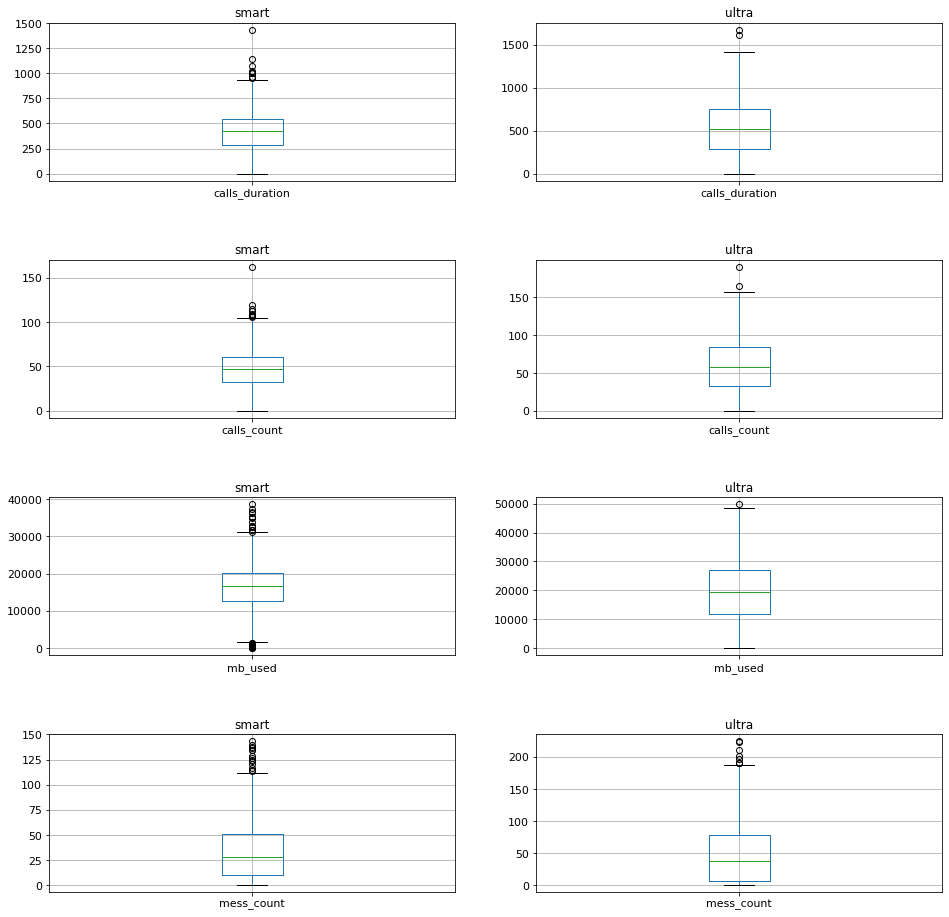

In [14]:
#Разделил датасет по тарифам `smart` и `ultra`
dataset_smart = dataset.loc[(dataset.index.get_level_values('tariff') == 'smart')]
dataset_ultra = dataset.loc[(dataset.index.get_level_values('tariff') == 'ultra')]

#Функция plotbox() принимает 4 аргумента: df - первый датасет,  df2 - второй датасет, 
#name1 - название для графика первого датасета, name2 - название для графика второго датасета.
#Для удобства сравнения, возвращает в одну строку по 2 графика каждой колонки.
def plotbox(df1,df2,name1,name2):
    plt.subplots(figsize=(16, 16))
    plt.subplots_adjust(hspace = 0.5)
    plt_i = 421
    
    for column in df1.columns[:-1]:

        plt.subplot(plt_i).title.set_text(name1)
        df1.boxplot(column=column, fontsize=11)
        plt_i += 1

        plt.subplot(plt_i).title.set_text(name2)
        df2.boxplot(column=column, fontsize=11)
        plt_i += 1

    plt.show()
    
plotbox(dataset_smart,dataset_ultra,'smart','ultra')

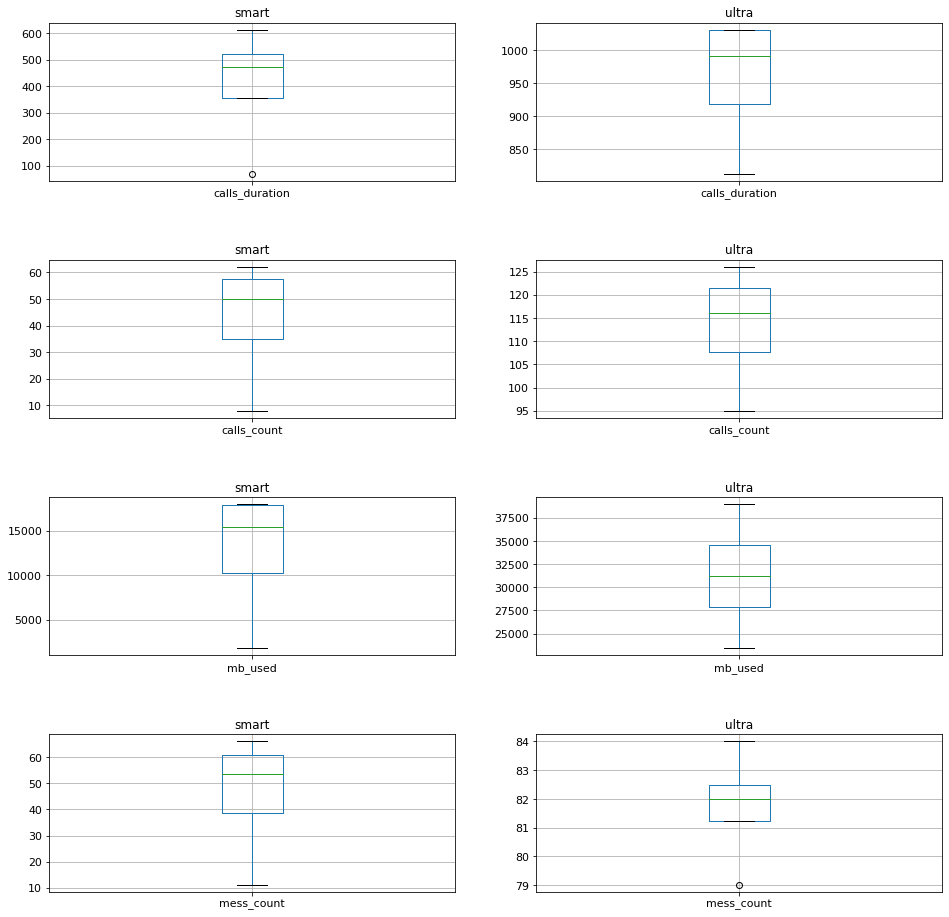

In [15]:
plotbox(dataset_smart[-4:],dataset_ultra[-4:],'smart','ultra')

In [16]:
dataset_smart.describe()
dataset_ultra.describe()

,calls_duration,calls_count,mb_used,mess_count,profit
count,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000
mean,417.934948,46.947510,16229.188425,33.384029,1249.908659
std,190.313730,21.039171,5877.576978,28.227876,814.406479
min,0.000000,0.000000,0.000000,0.000000,550.000000
25%,282.000000,32.000000,12658.000000,10.000000,550.000000
50%,422.000000,47.000000,16531.000000,28.000000,971.000000
75%,545.000000,61.000000,20068.000000,51.000000,1697.400000
max,1435.000000,162.000000,38610.000000,143.000000,6916.000000


,calls_duration,calls_count,mb_used,mess_count,profit
count,985.000000,985.000000,985.000000,985.000000,985.000000
mean,526.623350,59.236548,19486.901523,49.363452,2063.182690
std,317.606098,35.562722,10096.317202,47.804457,364.856367
min,0.000000,0.000000,0.000000,0.000000,1950.000000
25%,284.000000,33.000000,11785.000000,6.000000,1950.000000
50%,518.000000,58.000000,19324.000000,38.000000,1950.000000
75%,752.000000,84.000000,26863.000000,79.000000,1950.000000
max,1673.000000,190.000000,49789.000000,224.000000,4810.350000


In [17]:
#Функция plotScissor() удаляет выбросы из датасета.
def plotScissor(df_describe):
    temp = df_describe.describe()
    df_temp = df_describe
    print('----------------------')
    print('Кол-во до обработки:')
    print(df_temp.count())
    print()
    query_str = ''
    for col in temp.columns[:-1]:
        temp_1q = temp[col]['25%'] # Первый квартиль
        temp_3q = temp[col]['75%'] # Третий квартиль
        temp_max = temp[col]['max'] # Максимальное значение
        globals()["{}_h".format(col)] = temp_3q + (temp_3q - temp_1q)*1.5 # Верхнее(правое) значение усов
        globals()["{}_l".format(col)] = temp_1q - (temp_3q - temp_1q)*1.5 # Нижнее(левое) значение усов
        
        print(col)
        print('Верхний ус: {}'.format(globals()["{}_h".format(col)]))
        query_str += "({} >= @{}_h) or ".format(col,col)
        if(globals()["{}_l".format(col)] > 0):
            query_str += "({} <= @{}_l) or ".format(col,col)
            print('Нижний ус: {}'.format(globals()["{}_l".format(col)]))
        print('')
        
    query_temp = df_describe.query(query_str[:-4])
    df_result = pd.concat([query_temp,df_temp]).drop_duplicates(keep=False)
    
    print()
    print('Кол-во после обработки:')
    print(df_result.count())
    print('----------------------')
    print()
    print()
    return df_result

printmd('**Удаление выбросов для dataset_smart**')
dataset_smart_new = plotScissor(dataset_smart)

printmd('**Удаление выбросов для dataset_ultra**')
dataset_ultra_new = plotScissor(dataset_ultra)

**Удаление выбросов для dataset_smart**

----------------------
Кол-во до обработки:
calls_duration    2229
calls_count       2229
mb_used           2229
mess_count        2229
profit            2229
dtype: int64

calls_duration
Верхний ус: 939.5

calls_count
Верхний ус: 104.5

mb_used
Верхний ус: 31183.0
Нижний ус: 1543.0

mess_count
Верхний ус: 112.5


Кол-во после обработки:
calls_duration    2169
calls_count       2169
mb_used           2169
mess_count        2169
profit            2169
dtype: int64
----------------------




**Удаление выбросов для dataset_ultra**

----------------------
Кол-во до обработки:
calls_duration    985
calls_count       985
mb_used           985
mess_count        985
profit            985
dtype: int64

calls_duration
Верхний ус: 1454.0

calls_count
Верхний ус: 160.5

mb_used
Верхний ус: 49480.0

mess_count
Верхний ус: 188.5


Кол-во после обработки:
calls_duration    974
calls_count       974
mb_used           974
mess_count        974
profit            974
dtype: int64
----------------------




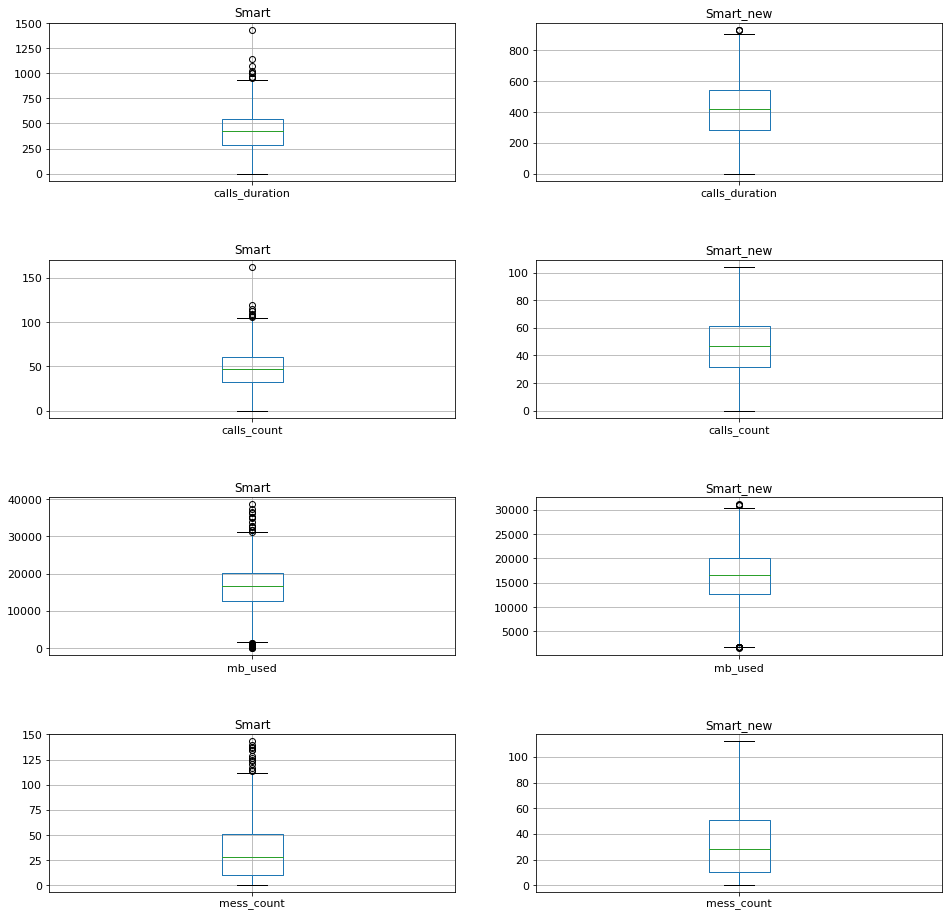

In [18]:
#Сравниваем результат до и после для тарифа `Smart`.
plotbox(dataset_smart,dataset_smart_new,'Smart','Smart_new')

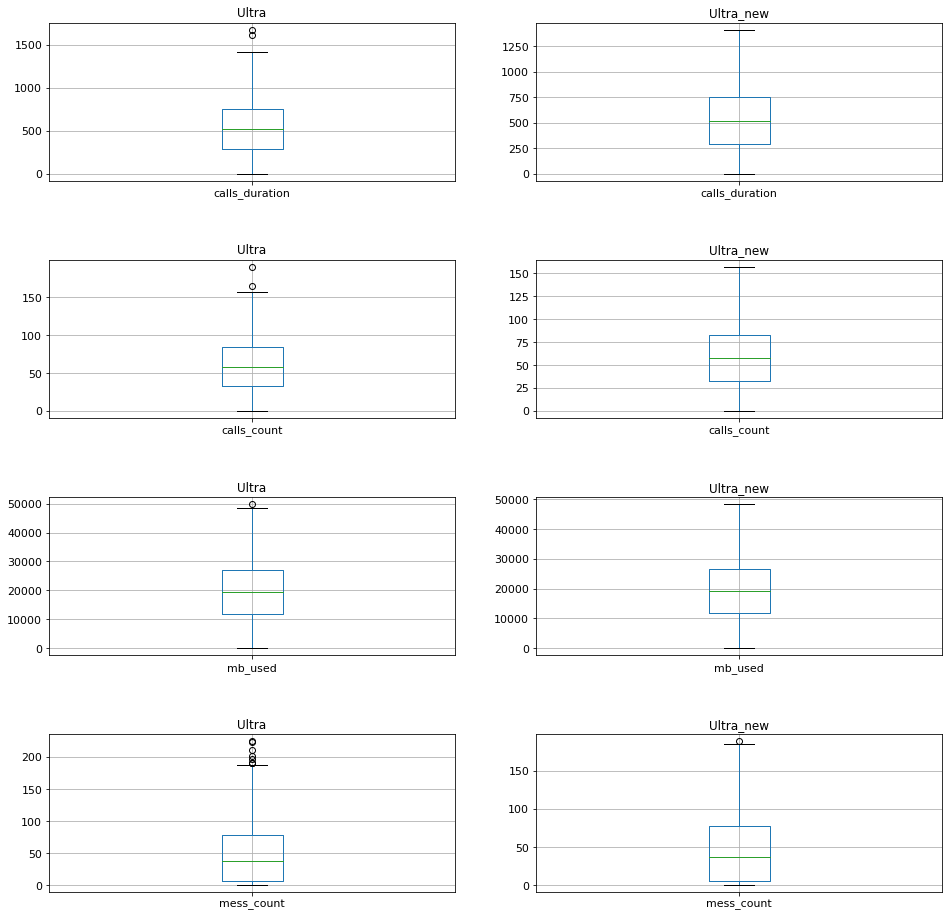

In [19]:
#Сравниваем результат до и после для тарифа `Ultra`.
plotbox(dataset_ultra,dataset_ultra_new,'Ultra','Ultra_new')

### Вывод

По результатам проделанной работы:
1. Посчитано количество сделанных звонков, израсходованных минут, отправленных сообщений и интернет-трафик по месяцам;
2. Посчитана помесячная выручка с каждого пользователя;
3. Удалены выбросы.

<a id='step_31'></a>
### 3.1 Анализ и описание данных:

In [20]:
print("Количество клиентов использующих тариф Smart: {}".format(df_users.query('tariff == "smart"')['user_id'].count()))
print("Количество клиентов использующих тариф Ultra: {}".format(df_users.query('tariff == "ultra"')['user_id'].count()))

Количество клиентов использующих тариф Smart: 351
Количество клиентов использующих тариф Ultra: 149


In [21]:
#Функция desc() выводит среднее, дисперсию и стандартное отклонение для всех колонок датафрейма,
#сгруппированных по входящему 2 параметру.

def desc(df,grby,val):
    dfgr = df.groupby(grby)
    for col in df.columns:
        print("{}:".format(col))
        print("{:<24} {:.2f}".format('Среднее значение:',dfgr.mean()[col].mean()))
        print("{:<24} {:.0f}".format('Дисперсия:',dfgr.var(ddof=0)[col].var(ddof=0)))
        print("{:<24} {:.2f}".format('Стандартное отклонение:',dfgr.std(ddof=0)[col].std(ddof=0)))
        print()
    
printmd('**Тариф Smart**')
desc(dataset_smart_new,'month',550)

printmd('**Тариф Ultra**')
desc(dataset_ultra_new,'month',1950)

**Тариф Smart**

calls_duration:
Среднее значение:        388.51
Дисперсия:               9772440
Стандартное отклонение:  9.11

calls_count:
Среднее значение:        43.54
Дисперсия:               1937
Стандартное отклонение:  1.19

mb_used:
Среднее значение:        15205.76
Дисперсия:               19526170697280
Стандартное отклонение:  402.20

mess_count:
Среднее значение:        31.35
Дисперсия:               23669
Стандартное отклонение:  3.40

profit:
Среднее значение:        1129.13
Дисперсия:               19080856964
Стандартное отклонение:  109.16



**Тариф Ultra**

calls_duration:
Среднее значение:        493.43
Дисперсия:               173587044
Стандартное отклонение:  22.51

calls_count:
Среднее значение:        55.46
Дисперсия:               28208
Стандартное отклонение:  2.54

mb_used:
Среднее значение:        18188.98
Дисперсия:               327145387738360
Стандартное отклонение:  1055.22

mess_count:
Среднее значение:        42.84
Дисперсия:               290506
Стандартное отклонение:  7.10

profit:
Среднее значение:        2037.98
Дисперсия:               5041578099
Стандартное отклонение:  139.87



**Smart**

Количество оплаченных месяцев: 2169
Процент не превысивших лимит: 67%
Процент превысивших лимит(сверхприбыль): 33%


**Ultra**

Количество оплаченных месяцев: 974
Процент не превысивших лимит: 100%
Процент превысивших лимит(сверхприбыль): 0%


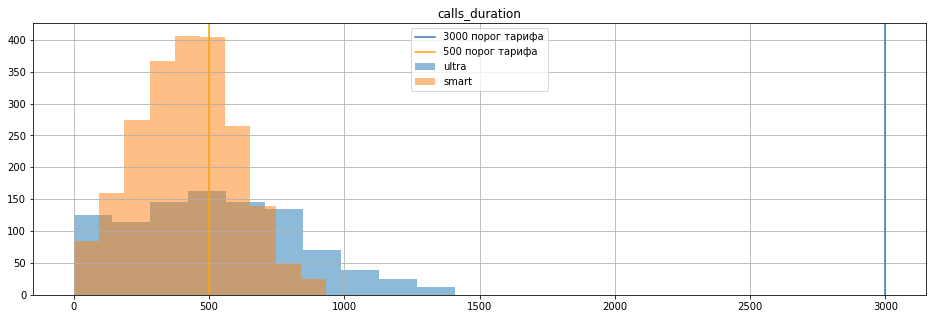

**Smart**

Количество оплаченных месяцев: 2169
Процент не превысивших лимит: 75%
Процент превысивших лимит(сверхприбыль): 25%


**Ultra**

Количество оплаченных месяцев: 974
Процент не превысивших лимит: 100%
Процент превысивших лимит(сверхприбыль): 0%


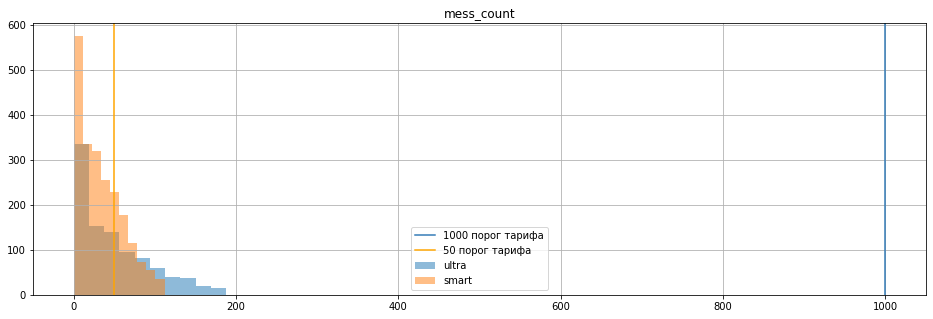

**Smart**

Количество оплаченных месяцев: 2169
Процент не превысивших лимит: 41%
Процент превысивших лимит(сверхприбыль): 59%


**Ultra**

Количество оплаченных месяцев: 974
Процент не превысивших лимит: 87%
Процент превысивших лимит(сверхприбыль): 13%


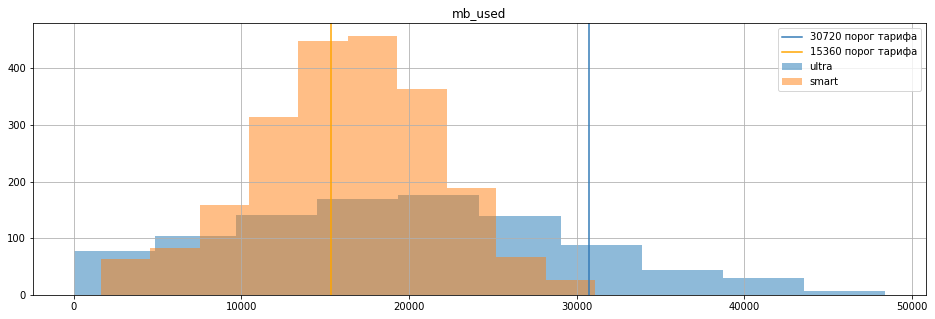

In [22]:
#Функция ext_info() выводит дополнительную информацию.
def ext_info(data,column,val,title):
    printmd('**'+title+'**')
    total = data[column].count()
    target = data.query(column+' <= '+str(val))[column].count()
    percent_below = (target * 100) / total
    percent_above = 100 - percent_below
    
    print('Количество оплаченных месяцев: {}'.format(total))
    print('Процент не превысивших лимит: {:.0f}%'.format(percent_below))
    print('Процент превысивших лимит(сверхприбыль): {:.0f}%'.format(percent_above))

#Функция hist_compare() выводит на один график столбчатые диаграммы двух тарифов для колонок.
def hist_compare():
    df = pd.concat([dataset_ultra_new,dataset_smart_new])

    for element in ['calls_duration','mess_count','mb_used']:
        tariff_bind = {'mess_count':'messages_included','mb_used':'mb_per_month_included','calls_duration':'minutes_included'}
               
        for tariff_name in df.index.get_level_values('tariff').unique():
            query = df.query('tariff == @tariff_name')
            query[element].hist(bins=10, alpha=0.5, label = tariff_name, figsize=(16,5))
        plt.title(element)

        
        for include in tariff_bind:
            if element == include:
                name = tariff_bind[include]
                smart_include = df_tariffs[tariff_bind[include]][0]
                ultra_include = df_tariffs[tariff_bind[include]][1]
                ext_info(dataset_smart_new,element,smart_include,'Smart')
                ext_info(dataset_ultra_new,element,ultra_include,'Ultra')
        
        xposition = {ultra_include:'#337ab7', smart_include:'orange'}
        for xc in xposition:
            plt.axvline(x=xc, color=xposition[xc], linestyle='-', label = (str(xc)+' порог тарифа'))
        plt.legend()
        plt.show()
        print()
        print()
        print()
        
hist_compare()

**Smart**

Количество оплаченных месяцев: 2169
Процент не превысивших лимит: 26%
Процент превысивших лимит(сверхприбыль): 74%


**Ultra**

Количество оплаченных месяцев: 974
Процент не превысивших лимит: 87%
Процент превысивших лимит(сверхприбыль): 13%


Text(0.5, 1.0, 'profit')

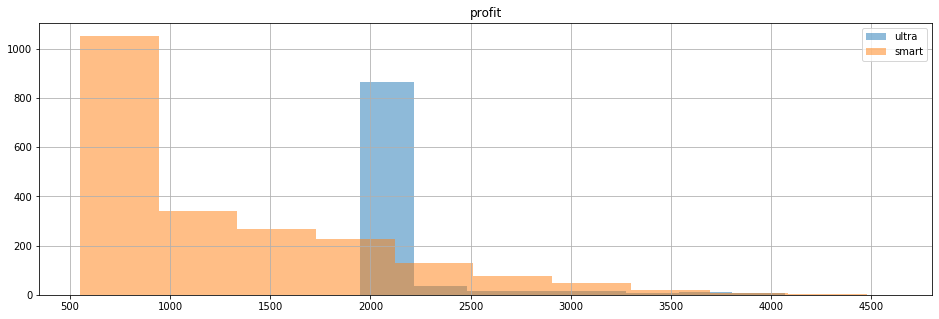

In [23]:
df = pd.concat([dataset_ultra_new,dataset_smart_new])
ext_info(dataset_smart_new,'profit',550,'Smart')
ext_info(dataset_ultra_new,'profit',1950,'Ultra')
for element in ['profit']:
    for name in df.index.get_level_values('tariff').unique():
        (df.query('tariff == @name')[element].hist(bins = 10, alpha = 0.5, label = name, figsize=(16,5)))
    plt.title(element)
    plt.legend()
    plt.show()

                calls_duration  calls_count   mb_used  mess_count    profit
calls_duration  1.000000        0.991483     0.193506  0.101244    0.085138
calls_count     0.991483        1.000000     0.193125  0.103217    0.085441
mb_used         0.193506        0.193125     1.000000  0.149736    0.604369
mess_count      0.101244        0.103217     0.149736  1.000000   -0.016428
profit          0.085138        0.085441     0.604369 -0.016428    1.000000

                calls_duration  calls_count   mb_used  mess_count    profit
calls_duration  1.000000        0.980531     0.282790  0.179568    0.390359
calls_count     0.980531        1.000000     0.289684  0.180234    0.385126
mb_used         0.282790        0.289684     1.000000  0.119116    0.836848
mess_count      0.179568        0.180234     0.119116  1.000000    0.063690
profit          0.390359        0.385126     0.836848  0.063690    1.000000


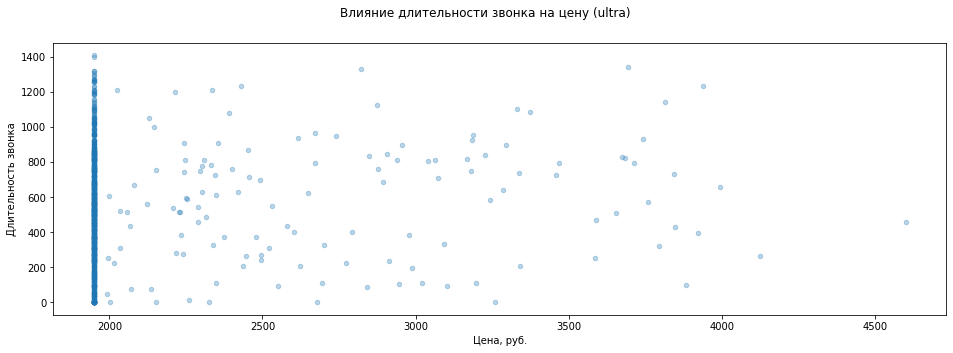

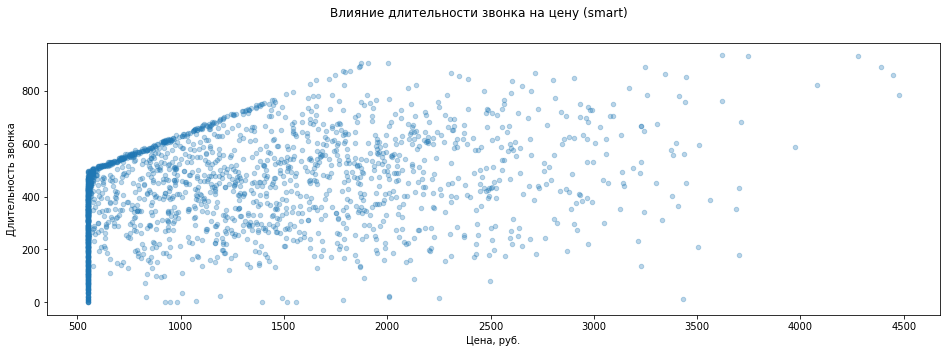

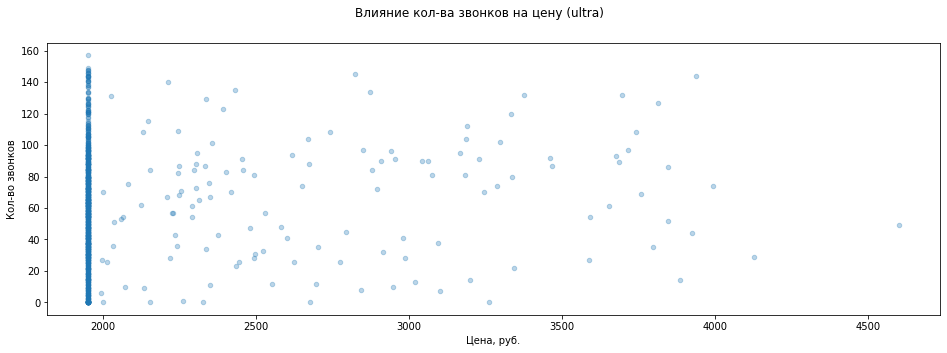

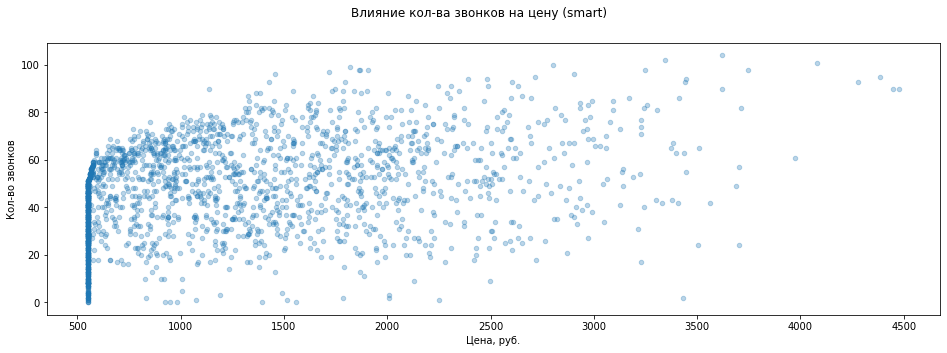

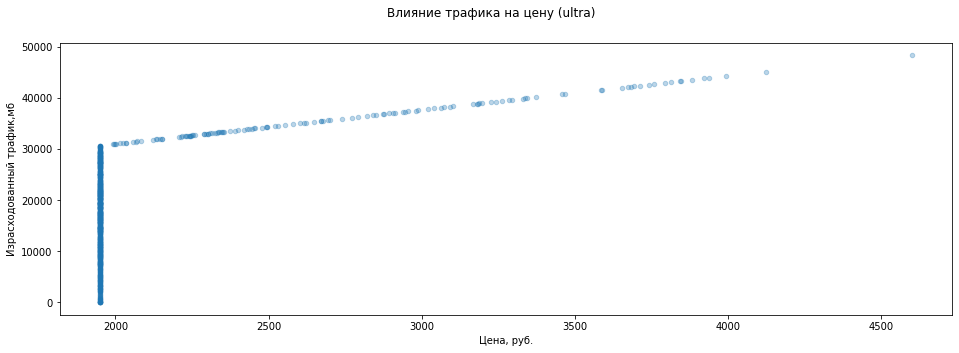

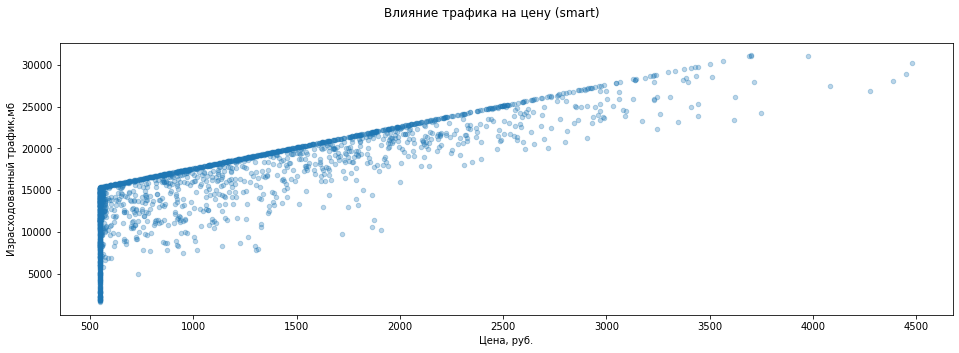

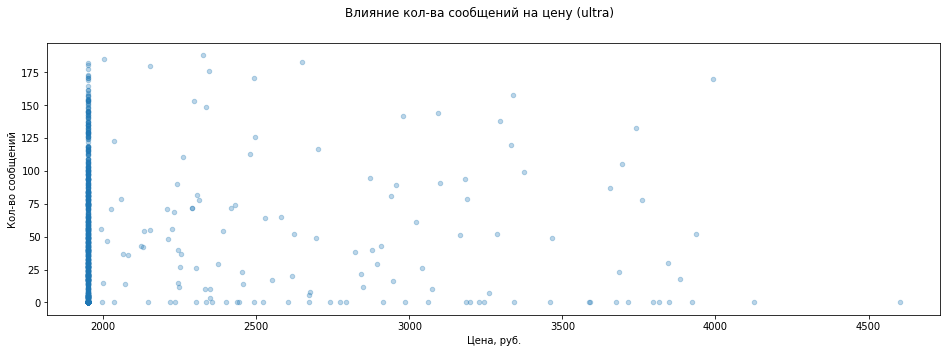

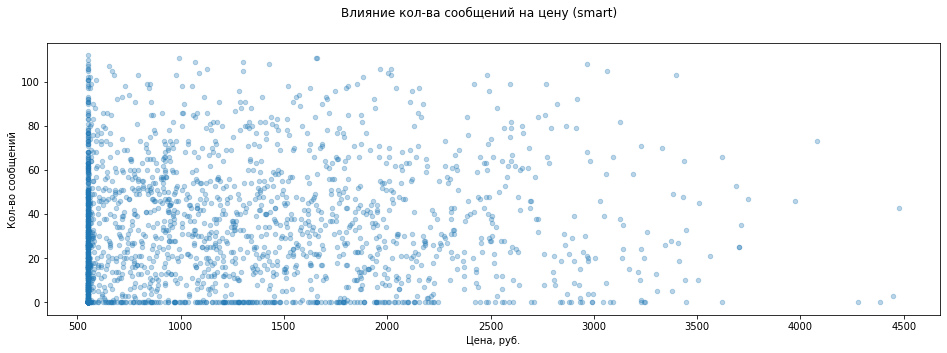

In [24]:
print(dataset_ultra_new.corr())
print()
print(dataset_smart_new.corr())
def correlation():
    corr_arr = {'calls_duration':['Длительность звонка','Влияние длительности звонка на цену'],'calls_count':['Кол-во звонков','Влияние кол-ва звонков на цену'],'mb_used':['Израсходованный трафик,мб','Влияние трафика на цену'],'mess_count':['Кол-во сообщений','Влияние кол-ва сообщений на цену']}
    for col in corr_arr:
        for tariff_name in df.index.get_level_values('tariff').unique():
            query = df.query('tariff == @tariff_name')
            query.plot(x='profit',y=col,kind='scatter', alpha=0.3,figsize=(16,5))
            plt.xlabel('Цена, руб.')
            plt.ylabel(corr_arr[col][0])
            plt.suptitle(corr_arr[col][1]+' ('+tariff_name+')')

correlation()

In [99]:
def calc_chance(tariff,threshold):
    mu = df.query('tariff == @tariff')['profit'].mean()
    sigma = df.query('tariff == @tariff')['profit'].std()

    p_bonus = 1 - st.norm(mu,sigma).cdf(threshold)
    print('Вероятность сверхприбыли для {}: {}'.format(tariff,p_bonus))
    
calc_chance('ultra',1950)
calc_chance('smart',550)

Вероятность сверхприбыли для ultra: 0.6210723524981752
Вероятность сверхприбыли для smart: 0.8167552539073235


### Вывод

Время звонков в месяц для пользователей "Smart" в среднем составляет 6.5 часов при 44 звонках. А пользователи тарифа "Ultra" в течении месяца разговаривают в среднем на 104 минуты дольше пользвателей смарта, совершая 56 звонков. При этом среднее время одного разговора для клиентов обоих тарифов составляет около 9 минут.<br><br>

По графикам видно, что по пользователи тарифа "Ultra" не выходят сверх лимита включенных в тариф минут разговора и сообщений, здесь получить сверхприбыль не удастся. Однако для тарифа "Smart" каждый третий месяц для звонков и каждый четвертый для сообщений приносят сверхприбыль.<br><br>

Особое внимание стоит уделить интернет-трафику, так как использованные мегабайты оказывают основное влияние на доход, показатель корреляции 0.83. Для "Smart" он приносит сверхприбыль в 59% случаев, а для "Ultra" в 13%.<br><br>

В целом пользователи "Smart" доплачивают за услуги сверх лимитов в 6 раз чаще чем пользователи "Ultra".

<a id='step_32'></a>
### 3.2 Проверка гипотез и пояснения:

Применил гипотезу о равенстве средних двух генеральных совокупностей.

Сравниваем генеральные совокупности прибыли по месяцам за 2018 год для тарифов 'Смарт' и 'Ультра'

<b>Нулевая гипотеза:</b> средняя выручка пользователей тарифа смарт и ультра равна.<br>
<b>Альтернативную гипотезу:</b> средняя выручка тарифа пользователей смарт и ультра различается.

In [25]:
from scipy import stats as st

#Пороговое значение alpha установил 5%
alpha = .05
results = st.ttest_ind(dataset_ultra_new['profit'], dataset_smart_new['profit'], equal_var = False)
print('p-значение:', results.pvalue) 

printmd('**Вывод:**')
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу. Средняя выручка тарифов различается.")
else:
    print("Не получилось отвергнуть нулевую гипотезу. Средняя выручка тарифов равна.")

p-значение: 4.2521266e-317


**Вывод:**

Отвергаем нулевую гипотезу. Средняя выручка тарифов различается.


Помня, что данные никогда не смогут доказать или подтвердить гипотезу, посмотрим еще раз на средние значения.

In [26]:
print('Средняя выручка в месяц, тариф `Ultra`: {:.2f} руб.'.format(dataset_ultra_new['profit'].mean()))
print('Средняя выручка в месяц, тариф `Smart`: {:.2f} руб.'.format(dataset_smart_new['profit'].mean()))
print()

total_profit_count = df['profit'].count()
smart_profit_count = dataset_smart_new['profit'].count()
ultra_profit_count = dataset_ultra_new['profit'].count()

ultra_percent = round(( ultra_profit_count * 100) / total_profit_count,0)
smart_percent = 100 - ultra_percent

print('Общее кол-во платежей: {} (100%)'.format(total_profit_count))
print()
print('Кол-во платежей по тарифу `Ultra`: {} ({:.0f}%)'.format(ultra_profit_count,ultra_percent))
print('Кол-во платежей по тарифу `Smart`: {} ({:.0f}%)'.format(smart_profit_count,smart_percent))
print()
print('Общая прибыль по тарифу `Ultra`: {:.2f} руб.'.format(dataset_ultra_new['profit'].sum()))
print('Общая прибыль по тарифу `Smart`: {:.2f} руб.'.format(dataset_smart_new['profit'].sum()))

Средняя выручка в месяц, тариф `Ultra`: 2058.12 руб.
Средняя выручка в месяц, тариф `Smart`: 1220.67 руб.

Общее кол-во платежей: 3143 (100%)

Кол-во платежей по тарифу `Ultra`: 974 (31%)
Кол-во платежей по тарифу `Smart`: 2169 (69%)

Общая прибыль по тарифу `Ultra`: 2004612.60 руб.
Общая прибыль по тарифу `Smart`: 2647631.80 руб.


In [27]:
#Добавил колонку 'city' используя функцию add_matched_col().
df['city'] = df.apply(lambda x: add_matched_col(x,'city'), axis=1)
df.head(3)

calls_duration  calls_count  mb_used  mess_count  \
user_id tariff month                                                     
1000    ultra  5      159.0           17.0         2256.0   22.0         
               6      172.0           28.0         23257.0  60.0         
               7      340.0           41.0         14016.0  75.0         

                      profit       city  
user_id tariff month                     
1000    ultra  5      1950.0  Краснодар  
               6      1950.0  Краснодар  
               7      1950.0  Краснодар

Сравниваем генеральные совокупности прибыли по месяцам за 2018 год для пользователей из Москвы и других регионов.

<b>Нулевая гипотеза:</b> средняя выручка пользователей из Москвы и пользователей из других регионов равна.<br>
<b>Альтернативную гипотезу:</b> средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

In [28]:
alpha = .05
results = st.ttest_ind(df.query('city == "Москва"')['profit'], df.query('city != "Москва"')['profit'], equal_var = False)
print('p-значение:', results.pvalue) 

printmd('**Вывод:**')
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу.")
else:
    print("Не получилось отвергнуть нулевую гипотезу.")

p-значение: 0.2494571626525252


**Вывод:**

Не получилось отвергнуть нулевую гипотезу.


In [29]:
print('Средняя выручка в месяц для Москвы: {:.2f} руб.'.format(df.query('city == "Москва"')['profit'].mean()))
print('Средняя выручка в месяц для других городов: {:.2f} руб.'.format(df.query('city != "Москва"')['profit'].mean()))

print()

total_profit_count = df['profit'].count()
moscow_profit_count = df.query('city == "Москва"')['profit'].count()
other_profit_count = df.query('city != "Москва"')['profit'].count()

moscow_percent = round(( moscow_profit_count * 100) / total_profit_count,0)
other_percent = 100 - moscow_percent

print('Общее кол-во платежей: {} (100%)'.format(total_profit_count))
print()
print('Кол-во платежей по тарифу для Москвы: {} ({:.0f}%)'.format(moscow_profit_count,moscow_percent))
print('Кол-во платежей по тарифу для других городов: {} ({:.0f}%)'.format(other_profit_count,other_percent))
print()
print('Общая прибыль по тарифу для Москвы: {:.2f} руб.'.format(df.query('city == "Москва"')['profit'].sum()))
print('Общая прибыль по тарифу для других городов: {:.2f} руб.'.format(df.query('city != "Москва"')['profit'].sum()))

Средняя выручка в месяц для Москвы: 1511.00 руб.
Средняя выручка в месяц для других городов: 1472.83 руб.

Общее кол-во платежей: 3143 (100%)

Кол-во платежей по тарифу для Москвы: 606 (19%)
Кол-во платежей по тарифу для других городов: 2537 (81%)

Общая прибыль по тарифу для Москвы: 915663.05 руб.
Общая прибыль по тарифу для других городов: 3736581.35 руб.


### Вывод

<a id='step_4'></a>
### 4. Общий вывод

Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

In [30]:
display_side_by_side(
    [age_group, city_group.sort_values(by="Кол-во",ascending=False).head(10),tariff_group], 
    ['Возрастные группы', 'Распределение по городам', 'Предпочитаемые тарифы']
)

,Кол-во,Процент
age_group,,
18 - 24 года,59,11.800000
25 - 44 года,175,35.000000
45 - 64 года,171,34.200000
65 лет и старше,95,19.000000
,Кол-во,Процент
city,,
Москва,99,19.800000
Санкт-Петербург,39,7.800000
Новосибирск,16,3.200000


<div id="fix_3" style="border:solid blue 2px; padding: 20px">
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Клиентами компании «Мегалайн», судя по выборке из 500 человек за 2018 год, являются люди разных возрастных групп от 18 до 75 лет. По большему счету это люди с возрастом 25-44 и 45-65 лет. К этим группам относится экономически активное население, в большинстве это семейные люди с сформированным уровнем достатка.<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Из выборки ясно, что географический разброс клиентов велик. Общее количество городов 76. Из них топ-3 с наибольших количеством клиентов: 99 (19,8%) из Москвы, 39 (7,8%) из Санкт-Петербурга, 16 (3,2%) из Новосибирска. Остальные 346 (69,2%) клиентов распределены в незначительных количествах по 73 городам России.<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Определенно, большинство клиентов использует тариф "Smart" нежели "Ultra", 351 (70,2%) против 149 (29,8%). Обратим внимание на гистограммы показывающие сколько звонков и сообщений каждый клиент отправил.</div>

<div id="fix_3" style="border:solid blue 2px; padding: 20px">   
Средняя выручка в месяц тарифа "Ultra" выше, чем выручка "Smart". Однако количество платежей по "Smart" в сумме за 2018 год гораздо больше, 69% против 31% у "Ultra", что делает "Smart" более выгодным тарифом благодоря выручке в разрезе года. Прибыль распределяется следующим образом: "Smart" - 2.64 млн. руб. (57%), "Ultra" - 2 млн. руб. (43%).<br></div>

В этом проекте, исследуя поведение клиентов компании «Мегалайн» с целью выявления более прибыльного тарифа, научился: расчитывать стандартное отклонение и дисперсию через методы var() и std(), строить подробные гистограммы, формулировать альтернативную и нулевую гипотезы, а так же интерпретировать полученные результаты.